# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pylab as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data_eng.csv',sep="\t")
pd.options.display.max_columns = 500

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Saint Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Shushary village,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Saint Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Saint Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Saint Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Conclusion

From just looking at the data and types of data in columns I can see that the first_day_exposition has a wrong data type.

### Step 2. Data preprocessing

First lets replace the missing values in balcony column with 0 and while we are at it convert the values to integers.

In [6]:
df['balcony']=df['balcony'].fillna(0)
df['balcony']=df['balcony'].astype(int)

let's look at mean and median of ceiling height columns before we decide which value to replace NaNs with.

In [7]:
df['ceiling_height'].median()

2.65

In [8]:
df['ceiling_height'].mean()

2.77149889685604

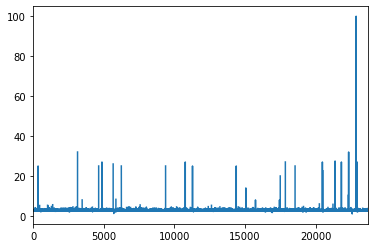

In [9]:
df['ceiling_height'].plot();

Now let's replace the missing values in ceiling_height column with the mean of the values present because mean and median are really close.

In [10]:
df['ceiling_height']=df['ceiling_height'].fillna(df['ceiling_height'].mean())

floor column does not have any missing values, however floors_total column does. In the step 3 of the project we are asked to add a column which says on which floor the apartament is on: first, last or other. Because of this I think that it will be best to fill the missing values in floors column with a random number because in that case we will be able to put the apartament into the other category and not harm the overall image of the data. Also lets convert the floors_total column into integers.

In [11]:
df['floors_total']=df['floors_total'].fillna(df['floor']+1)
df['floors_total']=df['floors_total'].astype(int)

living area and kitchen area columns also feature missing values. I decided to first figure out on average how much percent of the total area do kitchen and living areas take and then fill the missing data with this information.  first let's fill the missing values with zeroes.

In [12]:
df['living_area']=df['living_area'].fillna(0)
df['kitchen_area']=df['kitchen_area'].fillna(0)

In [13]:
df['living/total']=np.where(df['living_area'] != 0,df['living_area']/df['total_area'],np.NaN)
df['kitchen/total']=np.where(df['kitchen_area'] != 0,df['kitchen_area']/df['total_area'],np.NaN)

Now, lets calculate means of the columns where entries are not zero

In [14]:
kitchen_mean= df['kitchen/total'].mean()
living_mean=df['living/total'].mean()

now let's replace zeroes in the kitchen_area and living_area columns with the means and drop the columns that we don't need anymore, while we are at it let's drop the is_apartament column as well.

In [15]:
df['kitchen_area'] = df['kitchen_area'].replace(0,df['total_area'] * kitchen_mean)
df['living_area'] = df['living_area'].replace(0,df['total_area']*living_mean)

In [16]:
df = df.drop(columns=['is_apartment','living/total','kitchen/total'])

days exposition column also features missing data, lets replace NaN's with the mean of the column.

In [17]:
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].mean())

let's fill the locality name column NaN's with no info string.

In [18]:
df['locality_name']=df['locality_name'].fillna('no info')

Because I will not be using ponds_nearest, ponds_around3000, parks_nearest, parks_around3000 columns lets replace the missing values with "no info" string.

In [19]:
df['ponds_nearest'].fillna('no info');
df['ponds_around3000'].fillna('no info');
df['parks_nearest'].fillna('no info');
df['parks_around3000'].fillna('no info');

Now lets work on missing values in cityCenter_nearest column. By looking at the data most missing values in that column are in localities that are not Saint Peterburg, this is clear from the task where I had to look only at the Saint Peterburg locality. Because of this reason lets replace the missing values with medians because mean and median are close.

In [20]:
df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median());

### Step 3. Make calculations and add them to the table

First lets work on adding the price_per_square_metre column to the table. Both total_area and last_price columns don't have any missing values anymore so adding the mentioned above column should not be a problem.

In [21]:
df['price_per_square_metre'] = df['last_price'] / df['total_area']

Now let's work on adding the columns for day of the week, month and year the add was published. For this let's first convert the entries in first_day_exposition column to datetime type.

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
 

In [23]:
df['add_day'] = df['first_day_exposition'].dt.weekday
df['add_month']=df['first_day_exposition'].dt.month
df['add_year']= df['first_day_exposition'].dt.year

Now lets add a column which will tell us on which floor is the apartament first last or other. for this let's use a function.

In [24]:
def floor_names(data):
    if data['floor'] == data['floors_total']:
        return 'Top'
    if data['floor'] == 1:
        return 'Bottom'
    return 'Other'

In [25]:
df['which_floor'] = df.apply(floor_names,axis=1)

Now let's work on adding columns with ratios between living area and total area and kitchen area and total area.

In [26]:
df['living/total']=df['living_area']/df['total_area']
df['kitchen/total']=df['kitchen_area']/df['total_area']

### Step 4. Conduct exploratory data analysis and follow the instructions below:

Let's start by investigating square area, price, number of rooms, and ceiling height.

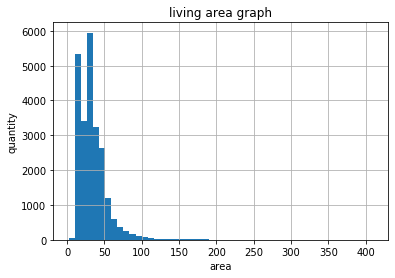

In [27]:
df['living_area'].hist(bins=50);
plt.xlabel('area');
plt.ylabel('quantity');
plt.title('living area graph');

In [28]:
df['living_area'].describe()

count    23699.000000
mean        34.562480
std         22.326965
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

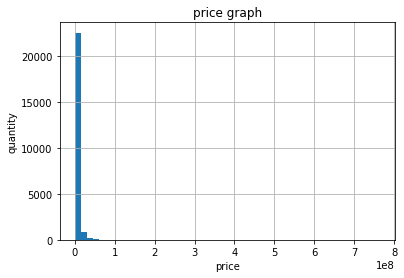

In [29]:
df['last_price'].hist(bins=50,range=(1.219000e+04,7.630000e+08));
plt.xlabel('price');
plt.ylabel('quantity');
plt.title('price graph');

In [30]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

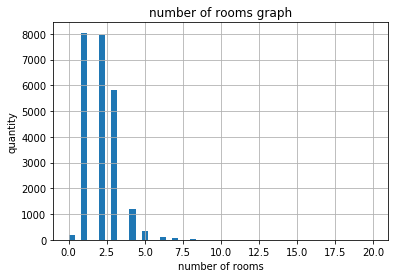

In [31]:
df['rooms'].hist(bins=50,range=(0,20));
plt.xlabel('number of rooms');
plt.ylabel('quantity');
plt.title('number of rooms graph');

In [32]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

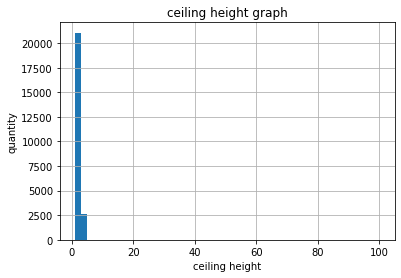

In [33]:
df['ceiling_height'].hist(bins=50,range=(1,100));
plt.xlabel('ceiling height');
plt.ylabel('quantity');
plt.title('ceiling height graph');

In [34]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.771499
std          0.986523
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

From just looking at data in these columns I can not draw any conclusions, columns don't feature a lot of outliers.

Now let's focuse on time it takes to make a sale.

In [35]:
df['days_exposition'].describe()

count    23699.000000
mean       180.888634
std        204.449692
min          1.000000
25%         45.000000
50%        124.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

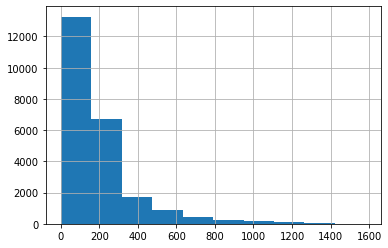

In [36]:
df['days_exposition'].hist();

In [37]:
df['days_exposition'].mean()

180.88863436982166

In [38]:
df['days_exposition'].median()

124.0

The histogram has a positive skew, also mean and median are relatively close together, I think that the average time it takes to sell a house should be our mean value 180 days, the skew of the histogram starts at around 500 days, so we can deduct that if the sale takes more then 500 days then we can say that it takes a long time.

In the parameters I examined I did not really see any outlieing or rare values that might have been wrong or distorted the overall image of the data.

Now lets group the data and see which factors have the biggest influence on the apartaments price

you are right there are outliers in the days exposition column, lets look at the boxplots

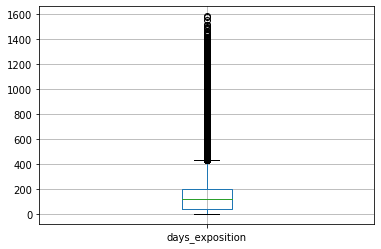

In [39]:
df.boxplot(column='days_exposition');

I can see exactly what you said most of the data is less then 199 days, I think I c an treat every value with more the 400 days as an outlier.

In [40]:
df = df[df['days_exposition']<=400]

In [41]:
x=df.groupby('total_area')['last_price'].agg('mean')

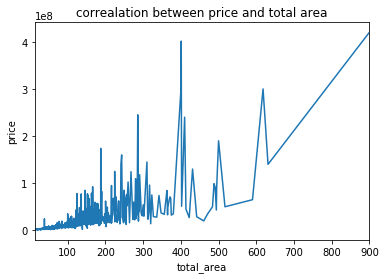

In [42]:
x.plot();
plt.ylabel('price');
plt.title('correalation between price and total area');

In [43]:
x=df.groupby('rooms')['last_price'].agg('mean')

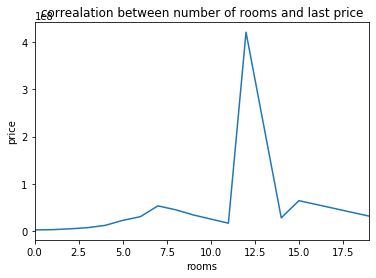

In [44]:
x.plot();
plt.ylabel('price');
plt.title('correalation between number of rooms and last price');

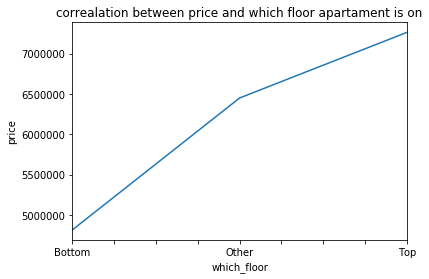

In [45]:
x=df.groupby('which_floor')['last_price'].agg('mean')
x.plot()
plt.ylabel('price');
plt.title('correalation between price and which floor apartament is on');

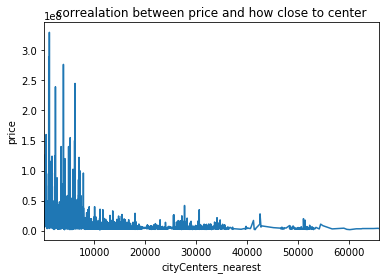

In [46]:
x=df.groupby('cityCenters_nearest')['last_price'].agg('mean')
x.plot();
plt.ylabel('price');
plt.title('correalation between price and how close to center');

In [47]:
df['add_day'].corr(df['last_price'])

-0.0012082492178416308

In [48]:
df['add_month'].corr(df['last_price'])

-3.42716087679386e-05

In [49]:
df['add_year'].corr(df['last_price'])

-0.019120486488256885

From examining the data I see that total area greatly influences the total price, bigger the apartament more it costs which is logical. number of rooms is a little strange the prices spike at around 12 rooms however they start to decrease afterwards which is strange, I think that it might be because the apartaments with more number of rooms might be in worse place in town and thus they cost less. distance to city center shows very predictable results, closer apartament is to the center more expensive it is. Did not notice any major correalation between the day,month and the year of the add starting to the last_price. I know that there are a lot of missing values in distance to city center column however it is less then 50% of the data and I could not think of any clever way to fill the nans so I decided to work with the data which is present and leave NaN's as they are.

Now lets work with localities and price per square metre.

In [50]:
df['locality_name'].value_counts().head(10)

Saint Peterburg      13924
Murino village         509
Shushary village       401
Vsevolozhsk            349
Pushkin                328
Kolpino                310
Pargolovo village      296
Gatchina               270
Kudrovo village        261
Vyborg                 211
Name: locality_name, dtype: int64

these 10 localities have the biggest number of adds.

In [51]:
x=df.groupby('locality_name')['price_per_square_metre'].agg(['mean','count'])
x=x[x['count']>=237]
x.sort_values(by='mean',ascending=False)

,mean,count
locality_name,,
Saint Peterburg,114324.908388,13924
Pushkin,102867.485315,328
Kudrovo village,92699.569500,261
Pargolovo village,89792.458628,296
Murino village,85939.782539,509
Shushary village,78851.359506,401
Kolpino,75393.129146,310
Gatchina,69024.124054,270
Vsevolozhsk,69015.101735,349


conclusion: highest housing prices Saint Peterburg and Pushkin and the lowest Vyborg.

Now let's select the apartaments in Saint Peterburg and determine where does the downtown start.

In [52]:
x = df[df['locality_name']=='Saint Peterburg']

cityCenters_nearest column features a couple of missing values, lets fill them with mean.

In [53]:
x['cityCenters_nearest']=x['cityCenters_nearest'].fillna(x['cityCenters_nearest'].mean())

In [54]:
x['cityCenters_nearest_km']=x['cityCenters_nearest']/1000

In [55]:
x['cityCenters_nearest_km']= x['cityCenters_nearest_km'].astype(int)

In [56]:
y=x.groupby('cityCenters_nearest_km')['last_price'].agg('mean')

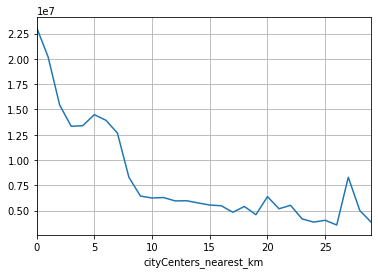

In [57]:
y.plot(grid=True);

plot shifts significantly at around 8 km, so I think thats where the downtown ends.

Now let's find correalation between total area, price, number of rooms, ceiling height

In [58]:
x=x[x['cityCenters_nearest_km']<=8]

In [59]:
t=x[['total_area','last_price','rooms','ceiling_height']]
t.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.632644,0.742074,0.028054
last_price,0.632644,1.000000,0.342733,0.025037
rooms,0.742074,0.342733,1.000000,0.018919
ceiling_height,0.028054,0.025037,0.018919,1.000000


we can see a big correalation between total area and number of rooms and last price.

now lets see the influence parameters have on the total price and compare it to the influence of the same parameters in the apartaments now it downtown Peterburg

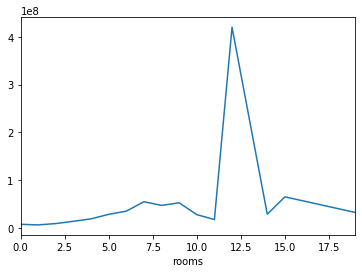

In [60]:
z=x.groupby('rooms')['last_price'].agg('mean')
z.plot();

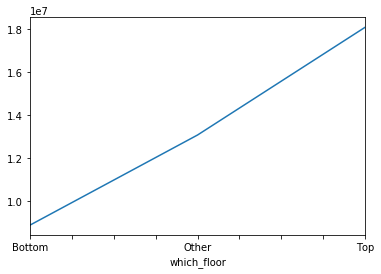

In [61]:
z=x.groupby('which_floor')['last_price'].agg('mean')
z.plot();

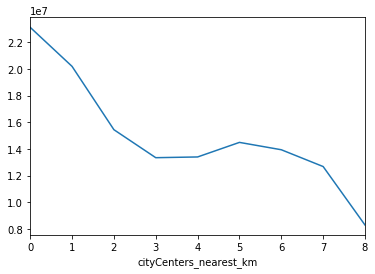

In [62]:
z=x.groupby('cityCenters_nearest_km')['last_price'].agg('mean')
z.plot();

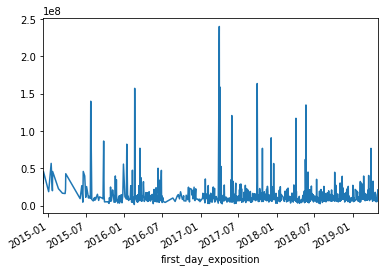

In [63]:
z=x.groupby('first_day_exposition')['last_price'].agg('mean')
z.plot();

in both apartaments inside and otside downtown, prices spike on around 12 rooms. the influence of the date and price is unknown because there is a lot of noice, also the price drops further we go from city center, also the price of the apartaments on the first floor is significantly lower then those which are higher.

### Step 5. Overall conclusion

Overall I did not find anything that is outside the common sence, however It was very interesting how same parameters influence the price in the same way Depending on the location of the apartament, whether it is in downtown Peterburg or not.

Parameters that affect the price most are which floor the apartament is on and also how close it is to city center. City center nearest graphs look almost the same and also number of rooms graphs both spike on the same value.